# CS 4320 - Introduction to Machine Learning

## Preprocessing

The data used in this project is from [this](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview) Kaggle competition. 

### Introducing the dataset and packages

In [193]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

In [194]:
# Import dataset
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

### Exploratory Data Analysis (EDA)

In [195]:
# preview dataset
display(train_df.head())
display(train_df.tail())

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [196]:
# Identify value types
train_df.info()
train_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


,id,date,store_nbr,family,sales,onpromotion
count,3.000888e+06,3000888,3.000888e+06,3000888,3.000888e+06,3.000888e+06
unique,NaN,1684,NaN,33,NaN,NaN
top,NaN,2013-01-01,NaN,AUTOMOTIVE,NaN,NaN
freq,NaN,1782,NaN,90936,NaN,NaN
mean,1.500444e+06,NaN,2.750000e+01,NaN,3.577757e+02,2.602770e+00
std,8.662819e+05,NaN,1.558579e+01,NaN,1.101998e+03,1.221888e+01
min,0.000000e+00,NaN,1.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,7.502218e+05,NaN,1.400000e+01,NaN,0.000000e+00,0.000000e+00
50%,1.500444e+06,NaN,2.750000e+01,NaN,1.100000e+01,0.000000e+00
75%,2.250665e+06,NaN,4.100000e+01,NaN,1.958473e+02,0.000000e+00


In [197]:
print("Number variables")
display(train_df.select_dtypes(include=['number']).describe())
print("Object variables")
display(train_df.select_dtypes(include=['object']).describe())


Number variables


,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


Object variables


,date,family
count,3000888,3000888
unique,1684,33
top,2013-01-01,AUTOMOTIVE
freq,1782,90936


Observe that the numerical features are: ['id', 'store_nbr', 'sales', 'onpromotion]. The categorical features are: ['date', 'family']. 

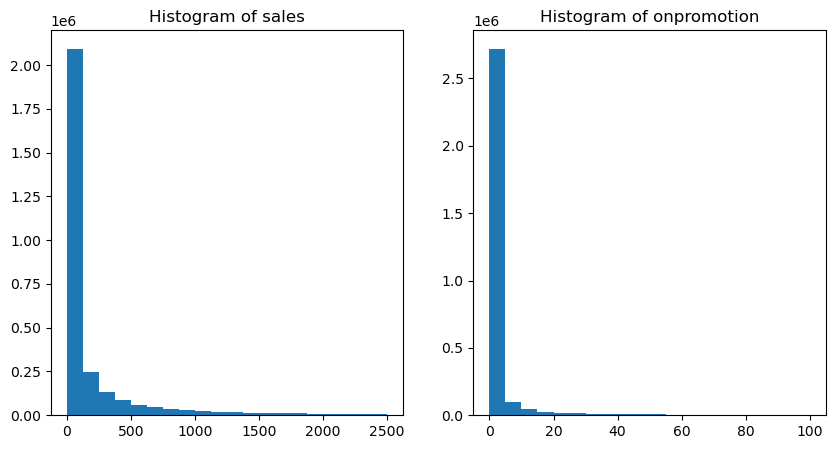

In [198]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(train_df['sales'], range=(0, 2500), bins=20)
axs[1].hist(train_df['onpromotion'], range=(0, 100), bins=20)

axs[0].set_title('Histogram of sales')
axs[1].set_title('Histogram of onpromotion')

plt.show()


In [199]:
train_df['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [200]:
# Checking for missing values
train_df.describe(include="all").loc['count']


id             3000888.0
date             3000888
store_nbr      3000888.0
family           3000888
sales          3000888.0
onpromotion    3000888.0
Name: count, dtype: object

<hr>

### Separating Features Vectors and Targets

Before separate, let's first augment the two variables using the CSV reference: 

In [201]:
# import csv files
holiday_events_df = pd.read_csv('data/holidays_events.csv')
stores_df = pd.read_csv('data/stores.csv')

In [202]:
# transforming 'date' based on holiday_events.csv
train_df['holiday_shopping'] = train_df['date'].isin(holiday_events_df['date']).astype(int)
test_df['holiday_shopping'] = test_df['date'].isin(holiday_events_df['date']).astype(int)


In [203]:
# transforming 'store_nbr' based on what cluster it is in
train_df['store_cluster'] = stores_df['cluster'].values[train_df['store_nbr'].values - 1]
test_df['store_cluster'] = stores_df['cluster'].values[test_df['store_nbr'].values - 1]


In [204]:
# delete old columns
train_df = train_df.drop('date', axis=1)
test_df = test_df.drop('date', axis=1)
train_df = train_df.drop('store_nbr', axis=1)
test_df = test_df.drop('store_nbr', axis=1)

In [205]:
# Display manual transformations so far
train_df.head()

,id,family,sales,onpromotion,holiday_shopping,store_cluster
0,0,AUTOMOTIVE,0.0,0,1,13
1,1,BABY CARE,0.0,0,1,13
2,2,BEAUTY,0.0,0,1,13
3,3,BEVERAGES,0.0,0,1,13
4,4,BOOKS,0.0,0,1,13


In [231]:
X_train = train_df.drop(columns=['sales'])
y_train = train_df['sales']

<hr>

### Transformation
1. For 'date', use the 'holiday_events.csv' to see if the date is in the holiday dataframe. If it is, set 'holiday_shopping' column to 1. Otherwise, 0.   
2. For 'store_nbr', use the 'stores.csv' to see which cluster it is in. There are 17 clusters as opposed to 54 stores, which is beneficial to analyzing such a large dataset. Then OneHotEncode it
3. For 'family', use OneHotEncoding. 
4. For 'sales', use StandardScale()
5. For 'onpromotion', passthrough

Note, there are no features with empty values so imputation wil not be used. 

In [213]:
# Feature Lists
categorical_features = ['family', 'store_cluster']
binary_features = ['holiday_shopping']
passthrough_features = ['id', 'onpromotion']
target = "sales"

Now, column transformer

In [235]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
binary_transformer = OneHotEncoder(drop="if_binary", dtype=int)

preprocessor = make_column_transformer(
    ('passthrough', passthrough_features),
    (categorical_transformer, categorical_features),
    (binary_transformer, binary_features)
)


In [236]:
# Preprocess training data
transformed = preprocessor.fit_transform(X_train)
transformed.shape

(3000888, 53)

In [237]:
column_names = passthrough_features + list(
    preprocessor.named_transformers_["onehotencoder-1"].get_feature_names_out(categorical_features)) + list(
    preprocessor.named_transformers_["onehotencoder-2"].get_feature_names_out(binary_features))

column_names

['id',
 'onpromotion',
 'family_AUTOMOTIVE',
 'family_BABY CARE',
 'family_BEAUTY',
 'family_BEVERAGES',
 'family_BOOKS',
 'family_BREAD/BAKERY',
 'family_CELEBRATION',
 'family_CLEANING',
 'family_DAIRY',
 'family_DELI',
 'family_EGGS',
 'family_FROZEN FOODS',
 'family_GROCERY I',
 'family_GROCERY II',
 'family_HARDWARE',
 'family_HOME AND KITCHEN I',
 'family_HOME AND KITCHEN II',
 'family_HOME APPLIANCES',
 'family_HOME CARE',
 'family_LADIESWEAR',
 'family_LAWN AND GARDEN',
 'family_LINGERIE',
 'family_LIQUOR,WINE,BEER',
 'family_MAGAZINES',
 'family_MEATS',
 'family_PERSONAL CARE',
 'family_PET SUPPLIES',
 'family_PLAYERS AND ELECTRONICS',
 'family_POULTRY',
 'family_PREPARED FOODS',
 'family_PRODUCE',
 'family_SCHOOL AND OFFICE SUPPLIES',
 'family_SEAFOOD',
 'store_cluster_1',
 'store_cluster_2',
 'store_cluster_3',
 'store_cluster_4',
 'store_cluster_5',
 'store_cluster_6',
 'store_cluster_7',
 'store_cluster_8',
 'store_cluster_9',
 'store_cluster_10',
 'store_cluster_11',
 'st

In [238]:
pd.DataFrame(transformed, columns=column_names)

,id,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,store_cluster_9,store_cluster_10,store_cluster_11,store_cluster_12,store_cluster_13,store_cluster_14,store_cluster_15,store_cluster_16,store_cluster_17,holiday_shopping_1
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3000884,3000884.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3000885,3000885.0,148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3000886,3000886.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
